In [ ]:
pip install numpy scipy scikit-learn pandas matplotlib

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
import shutil

# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
source_path = '/content/drive/MyDrive/Colab Notebooks/vai22ce1261/Solar.csv'
destination_path = '/content/clust1261.csv'

shutil.copy(source_path, destination_path)
df = pd.read_csv('clust1261.csv')

In [ ]:
df.iloc[:, :5].head()

,Air Temperature (C°),Air Temperature Uncertainty (C°),Wind Direction at 3m (°N),Wind Direction at 3m Uncertainty (°N),Wind Speed at 3m (m/s)
0,1.598833,-0.039841,-1.358521,0.163933,-0.351941
1,1.415552,-0.039841,-1.333544,0.163933,-0.460051
2,1.034891,-0.039841,-1.241959,0.163933,-0.784380
3,0.174880,-0.039841,-1.075441,0.163933,-1.000600
4,-0.572343,-0.039841,-0.883946,0.163933,-0.892490


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:]  # Select all columns except the first one

# Identify columns with string values (object dtype)
string_cols = X.select_dtypes(include=['object']).columns

# Drop or encode string columns
# Option 1: Drop string columns
# X = X.drop(columns=string_cols)

# Option 2: One-hot encode string columns
X = pd.get_dummies(X, columns=string_cols, drop_first=True)

# Continue with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Using 'ward' linkage
ward_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
ward_labels = ward_clustering.fit_predict(X_scaled)

# Using 'complete' linkage
complete_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')
complete_labels = complete_clustering.fit_predict(X_scaled)

# Using 'average' linkage
average_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
average_labels = average_clustering.fit_predict(X_scaled)

# Using 'single' linkage
single_clustering = AgglomerativeClustering(n_clusters=5, linkage='single')
single_labels = single_clustering.fit_predict(X_scaled)

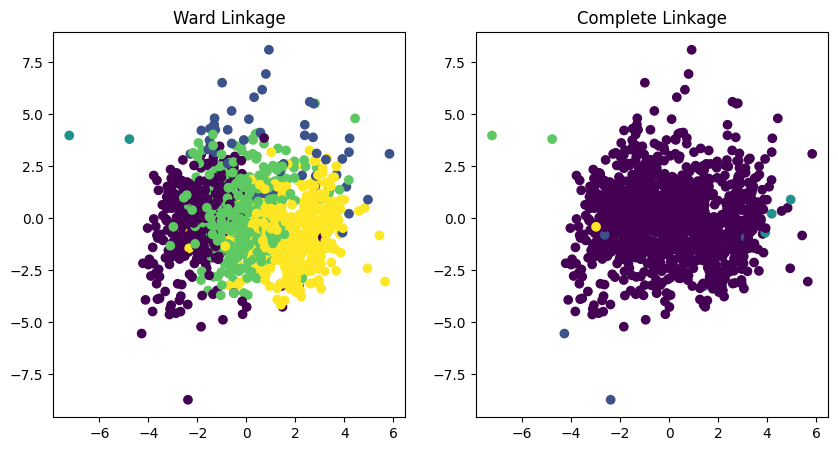

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ward_labels)
plt.title('Ward Linkage')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=complete_labels)
plt.title('Complete Linkage')

plt.show()

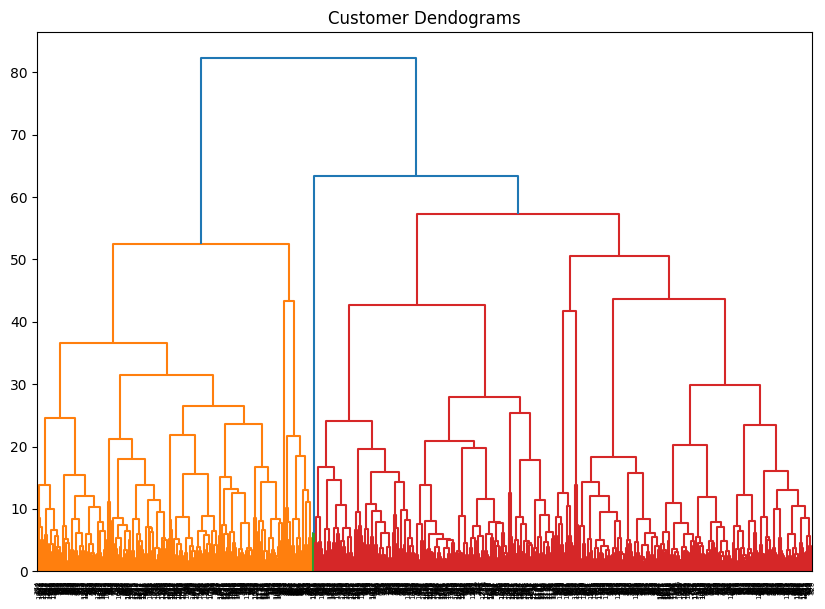

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import shutil

# ... (Your existing code for data loading and preprocessing) ...

# Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_ = cluster.fit_predict(X_scaled)

# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster.labels_, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('DHI (Wh/m2)')  # You might want to change this to a more descriptive label
plt.ylabel('GHI (Wh/m2)')  # You might want to change this to a more descriptive label
plt.show()